In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import random
import uuid
import hashlib
import seaborn as sns

In [51]:
df = pd.read_csv("C:/Users/jesus/Desktop/curso IA/clientes.csv")

In [52]:
df

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,47,0,51931
196,Richard Brown,673 Tagore,39,1,47712
197,Mary Garcia,617 Neruda,64,1,45261
198,James Wilson,236 Keats,43,1,46787


In [53]:
df['edad'] = (df['edad'] // 10 ) * 10
df

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,60,0,61050
1,James Jones,729 Neruda,60,1,53824
2,Patricia Wilson,935 Dickinson,10,0,60281
3,Elizabeth Robinson,459 Rilke,20,1,42187
4,Charles Brown,823 Ginsberg,20,1,37589
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,40,0,51931
196,Richard Brown,673 Tagore,30,1,47712
197,Mary Garcia,617 Neruda,60,1,45261
198,James Wilson,236 Keats,40,1,46787


In [54]:
ruido = np.random.normal(0, 100, size=df['salario'].shape  )
ruido

array([-128.32883691,  113.00426879,  -20.73778339,  -21.7859269 ,
         90.08686506,   72.45707702, -139.95060174,  115.95920965,
       -211.32365032,   68.28688691,   11.24752681,   -5.21809076,
         91.02546583,   48.28605362,    0.89684501,  -33.9983947 ,
        -87.55986   ,  -60.21660818,  -93.20581266,  109.81553751,
       -156.82979252, -119.0112939 ,  -90.56628306, -118.34384475,
         11.64538719,  140.63142327,   95.51707536,  125.95003514,
        -67.81646142, -170.75919469,   82.24118925,  210.99867775,
       -133.24901088,  -63.76921863, -136.11364833,   53.54313673,
        -46.92899882,  122.26163443, -220.28424143,  -46.3714409 ,
        -13.22433769,    1.26507087,   18.18418971,  187.52057687,
          6.76816138,  -68.5429912 , -113.00746585,   40.44572461,
         91.1655655 ,   15.47559444, -103.13794001,   96.83614956,
          6.35381971,   92.93181156, -113.6307401 ,  -64.12219682,
        -47.57011344, -103.60259578,   91.90653868,   -3.14817

In [55]:
df['salario'] += ruido
df

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,60,0,60921.671163
1,James Jones,729 Neruda,60,1,53937.004269
2,Patricia Wilson,935 Dickinson,10,0,60260.262217
3,Elizabeth Robinson,459 Rilke,20,1,42165.214073
4,Charles Brown,823 Ginsberg,20,1,37679.086865
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,40,0,51924.573357
196,Richard Brown,673 Tagore,30,1,47622.572818
197,Mary Garcia,617 Neruda,60,1,45243.388272
198,James Wilson,236 Keats,40,1,46773.849239


In [56]:
df.drop( 'direccion', axis=1, inplace=True )
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,60921.671163
1,James Jones,60,1,53937.004269
2,Patricia Wilson,10,0,60260.262217
3,Elizabeth Robinson,20,1,42165.214073
4,Charles Brown,20,1,37679.086865
...,...,...,...,...
195,Barbara Jones,40,0,51924.573357
196,Richard Brown,30,1,47622.572818
197,Mary Garcia,60,1,45243.388272
198,James Wilson,40,1,46773.849239


In [57]:
id_psuedo = []

In [58]:
for n in range( len(df) ):
    id_psuedo.append( uuid.uuid4() )
id_psuedo

[UUID('7c14a8eb-3314-47ab-9b39-038a7780d13a'),
 UUID('4a4736cd-5888-48a3-b58c-11985279ef4f'),
 UUID('92f349df-beed-40ba-8e1f-d5e1870dde9f'),
 UUID('c35375e0-ef95-4a17-8219-93cf85f1aa7c'),
 UUID('ef407f06-6588-4871-820c-f67f316ac02f'),
 UUID('3ebafba0-26a2-4d4a-a452-661c068e499e'),
 UUID('a1df4634-42d7-4869-8f80-34daee69cd62'),
 UUID('bec9b721-d610-4584-bd42-15c7d9bbd101'),
 UUID('0c2a95d5-3340-4b66-8bd1-6c1af266159e'),
 UUID('0ec0c5f6-bcfe-412a-b264-22204449843d'),
 UUID('bfbd4225-f3c0-4693-9e5c-6c174cc88586'),
 UUID('88f6449f-5cd2-4e03-af78-c39eb182a33d'),
 UUID('ebd60309-deee-4027-ab5b-0f86d6999b1e'),
 UUID('722904f9-c229-4cd0-989c-043e82601cca'),
 UUID('ca3f0163-2a4a-4e4c-b2a8-c10845300d26'),
 UUID('12c0fe43-6487-4d6d-a3c3-85a6a1b221fe'),
 UUID('a2833a0d-859c-40ce-a056-eb0e18e89a1b'),
 UUID('a71b856e-82e1-430d-872a-96a18fa36544'),
 UUID('775d7884-e73b-4b4d-813d-c9eb17b079cd'),
 UUID('7c383374-78b4-4bb5-bb32-738337c70979'),
 UUID('b9d0aaa0-4dac-420c-8291-12ec512b31a4'),
 UUID('45f9ad

In [59]:
df['id_pseudo'] = id_psuedo
df.drop( 'nombre', axis=1, inplace=True )
df

,edad,categoria,salario,id_pseudo
0,60,0,60921.671163,7c14a8eb-3314-47ab-9b39-038a7780d13a
1,60,1,53937.004269,4a4736cd-5888-48a3-b58c-11985279ef4f
2,10,0,60260.262217,92f349df-beed-40ba-8e1f-d5e1870dde9f
3,20,1,42165.214073,c35375e0-ef95-4a17-8219-93cf85f1aa7c
4,20,1,37679.086865,ef407f06-6588-4871-820c-f67f316ac02f
...,...,...,...,...
195,40,0,51924.573357,dfc0a2e0-2cf5-4787-a295-33fc961ae1bf
196,30,1,47622.572818,bb70b290-25e3-4da5-924b-988665c2feec
197,60,1,45243.388272,e82794d8-822b-4204-b7d1-b849d073f044
198,40,1,46773.849239,e86fa711-179b-4b5c-b1c6-384c54c9920b


In [60]:
agrupado = df.groupby('categoria')
agrupado

In [61]:
data_balanceada = pd.DataFrame()

In [62]:
for nombre, grupo in agrupado:
    grupo_balandeado = resample(grupo, replace=True, n_samples=100, random_state=123)
    data_balanceada = pd.concat( [data_balanceada, grupo_balandeado] )

data_balanceada

,edad,categoria,salario,id_pseudo
158,50,0,41849.982376,d59b08bc-e03c-48be-87a9-3ad19db89ddd
42,30,0,59453.184190,47e9c053-0887-449e-a029-094273be928b
194,40,0,49649.132211,447b6afb-0f56-4783-a5bb-35c43ccb2464
133,50,0,42081.113009,90b530d9-7753-4fca-b9f7-f459bf6e0846
114,60,0,53386.939889,ca2822a7-352a-42e8-90cd-dde6f2707dcb
...,...,...,...,...
179,40,1,54085.781689,dfccd4e0-4b1a-49e0-b09e-962d176c5be9
80,10,1,56231.974060,e95af7ef-4100-44ea-9554-0c7b25ac48f6
93,50,1,49348.087946,67ec8ec5-8fce-46c5-856e-682b2c753067
156,50,1,47988.341257,63bc8681-eb66-4bb8-8f40-9b35380be54f


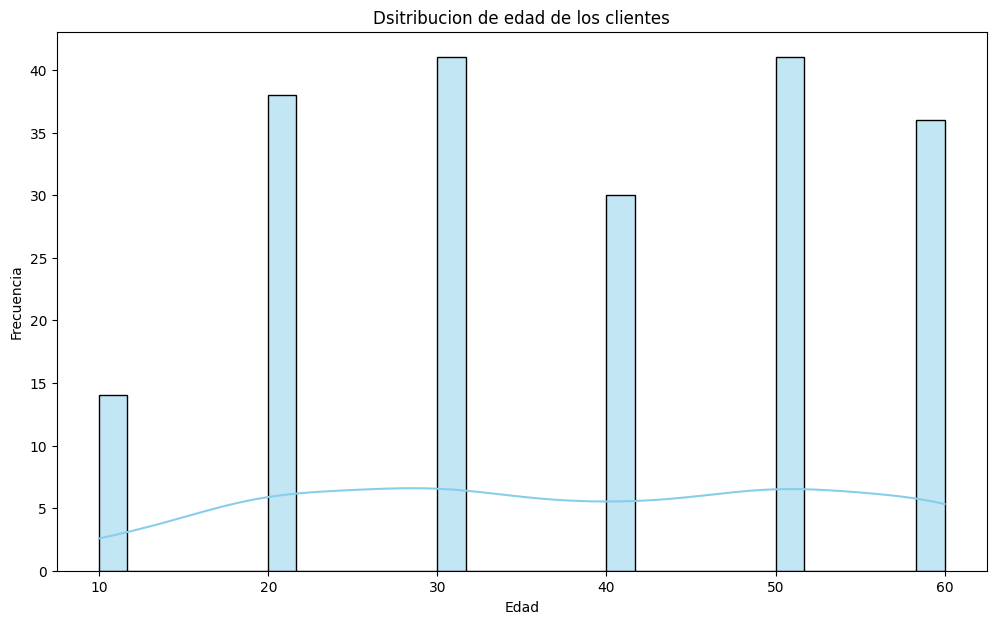

In [63]:
plt.figure(figsize=(12,7))
ax = sns.histplot( df['edad'], kde=True, color='skyblue', bins=30 )
ax.set( title='Dsitribucion de edad de los clientes', xlabel='Edad', ylabel='Frecuencia' );




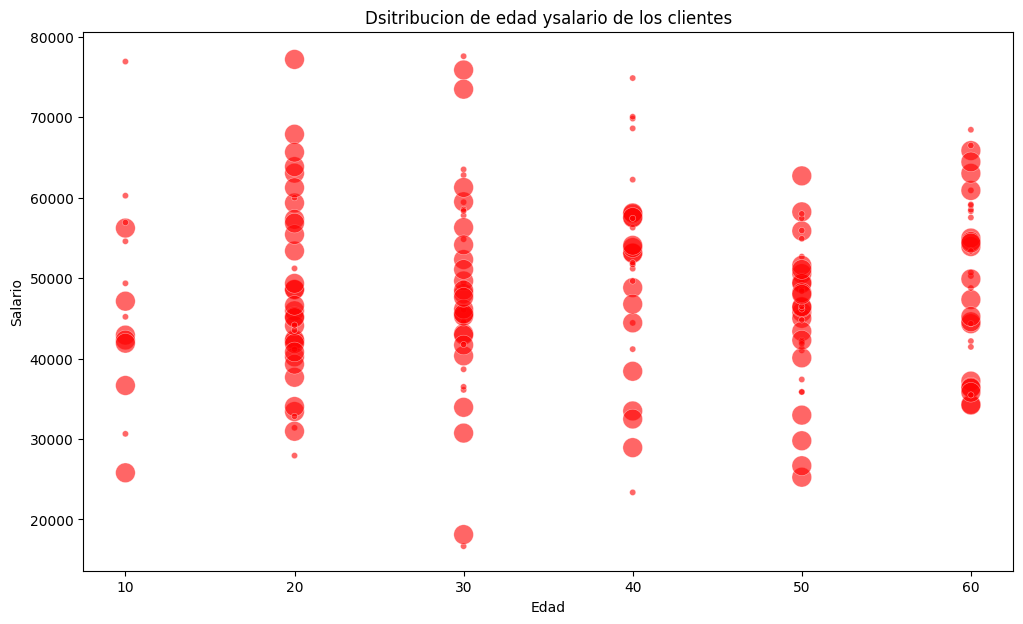

In [65]:
plt.figure(figsize=(12,7))
sizes = df['categoria'].replace( { 0:50, 1:100 } )
scatter = sns.scatterplot( x='edad', y='salario',  size=sizes, legend=False, sizes=(20,200), data=df, color='red', alpha=0.6 )
scatter.set( title='Dsitribucion de edad ysalario de los clientes', xlabel='Edad', ylabel='Salario' );

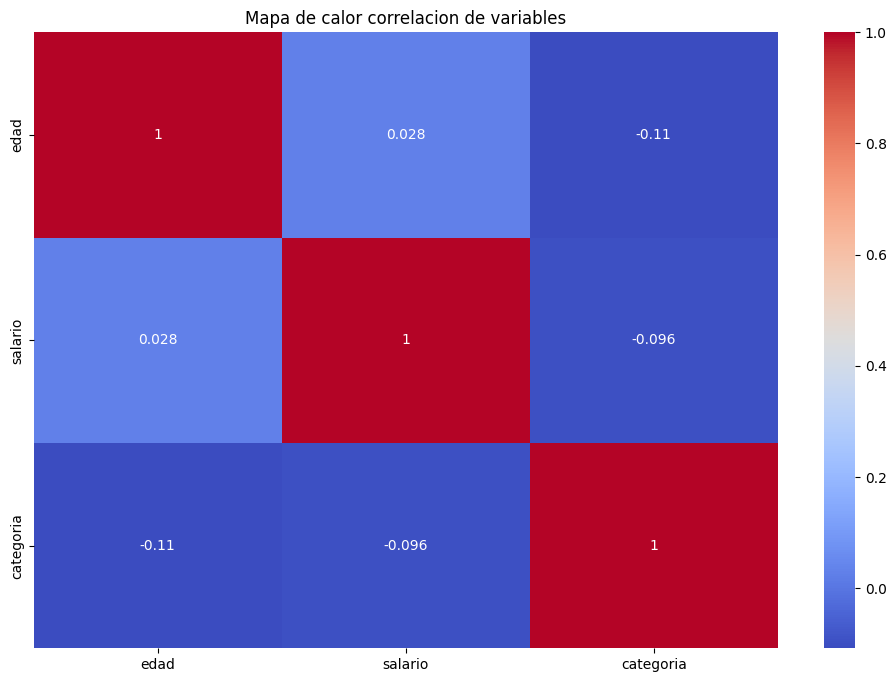

In [66]:
plt.figure(figsize=(12,8))
correlacion_matriz = df[[ 'edad',  'salario', 'categoria' ]].corr()
heatmap = sns.heatmap( correlacion_matriz, annot=True, cmap='coolwarm' )
heatmap.set( title='Mapa de calor correlacion de variables');